In [1]:
import warnings

import numpy as np

warnings.filterwarnings("ignore")
import sys
a = sys.path.append('../modules/')
c = sys.path.append('../tests/')
import os
import pandas as pd

import random

import matplotlib.pyplot as plt


from datetime import datetime
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

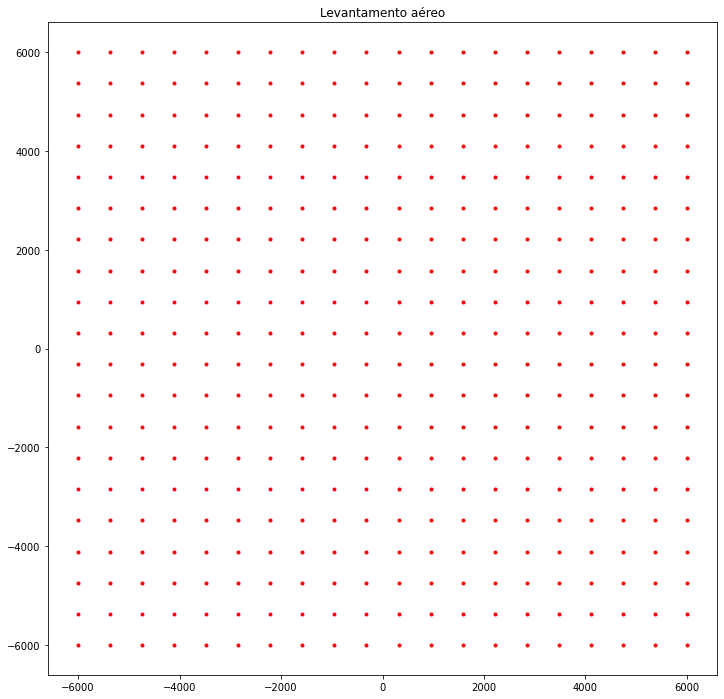

In [2]:
import genetic_algorithm as ga

In [3]:
populacao, anomaly_better, ind_better, val_fit, val_phi, val_theta, incl_better, decl_better, diversity_x, diversity_y, diversity_z, diversity_incl, diversity_decl, diversity_mom = ga.ga(ga.lamb, ga.n, ga.anomaly_cubo, ga.filhos_mut, ga.population)

In [4]:
fit_rodada = val_fit
theta_rodada = val_theta
phi_rodada = val_phi
incl_rodada = incl_better
decl_rodada = decl_better

n_fit = len(fit_rodada)
n_theta = len(theta_rodada)
n_phi = len(phi_rodada)

Y = ga.Y
X = ga.X
anomaly_cubo = ga.anomaly_cubo
anomaly_better = anomaly_better
first_anomaly = anomaly_better[0]
mid_anomaly = anomaly_better[int(n_fit/2)]
final_anomaly = anomaly_better[n_fit - 1]

print(theta_rodada[n_theta - 1])
print(phi_rodada[n_theta - 1])
print(incl_rodada[n_theta - 1])
print(decl_rodada[n_theta - 1])


8192.202464348651
3.726775249480903
0.7065907898116989
0.6970706821095958


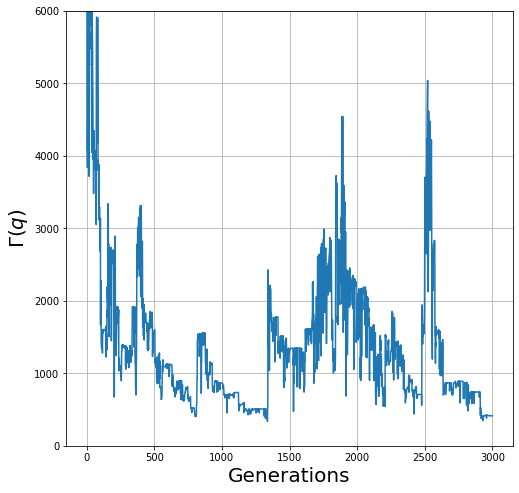

In [5]:
x = np.linspace(0, n_fit, n_fit)
fig = plt.figure(figsize=(8, 8))
plt.plot(x, fit_rodada)
plt.ylim(0, 6000)
#plt.title('Com o Lamb = 0.005', fontsize=20)
plt.xlabel('Generations', fontsize=20)
plt.ylabel('$\Gamma(q)$', fontsize=20)
plt.grid()
plt.show()

3000


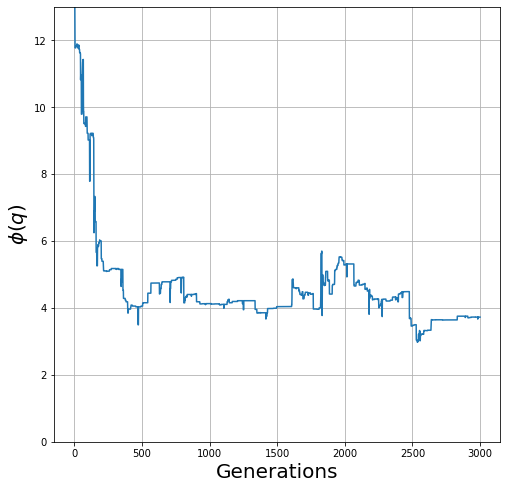

In [6]:
x = np.linspace(0, n_fit, n_fit)
print(len(x))
#print(phi_rodada)
fig = plt.figure(figsize=(8, 8))
plt.plot(x, phi_rodada)
plt.ylim(0, 13)
#plt.title('Com o Lamb = 0.005', fontsize=20)
plt.xlabel('Generations', fontsize=20)
plt.ylabel('$\phi(q)$', fontsize=20)
plt.grid()
plt.show()

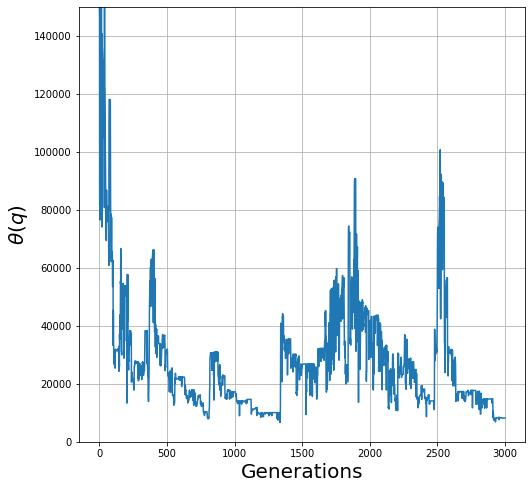

In [7]:
x = np.linspace(0, n_theta, n_theta)
fig = plt.figure(figsize=(8, 8))
plt.plot(x, theta_rodada)
plt.ylim(0,150000)
#plt.title('Theta com o Lamb = 0.005', fontsize=20)
plt.xlabel('Generations', fontsize=20)
plt.ylabel('$\\theta(q)$', fontsize=20)
plt.grid()
plt.show()

In [8]:
melhores_ind = ind_better
momento = ga.momento
I = ga.I
D = ga.D

frist_ind = melhores_ind[0]
mid_ind = melhores_ind[int(n_fit/2)]
last_ind = melhores_ind[n_fit - 1]

In [9]:
def divide_param_dipolo(pop):
    coodX1 = []
    coodY1 = []
    coodZ1 = []
    incl1 = []
    decl1 = []
    mag1 = []

    for i in range(len(pop)-1):
        coodX1.append(pop[i][0])
        coodY1.append(pop[i][1])
        coodZ1.append(pop[i][2])
        incl1.append(pop[len(pop)-1][0])
        decl1.append(pop[len(pop)-1][1])
        mag1.append(pop[len(pop)-1][2])
    return coodX1, coodY1, coodZ1, incl1, decl1, mag1

coodX1, coodY1, coodZ1, incl1, decl1, mag1 = divide_param_dipolo(frist_ind)
coodX2, coodY2, coodZ2, incl2, decl2, mag2 = divide_param_dipolo(mid_ind)
coodX3, coodY3, coodZ3, incl3, decl3, mag3 = divide_param_dipolo(last_ind)
print(len(coodX3))
print(mag3[0])

20
1467153144.6640484


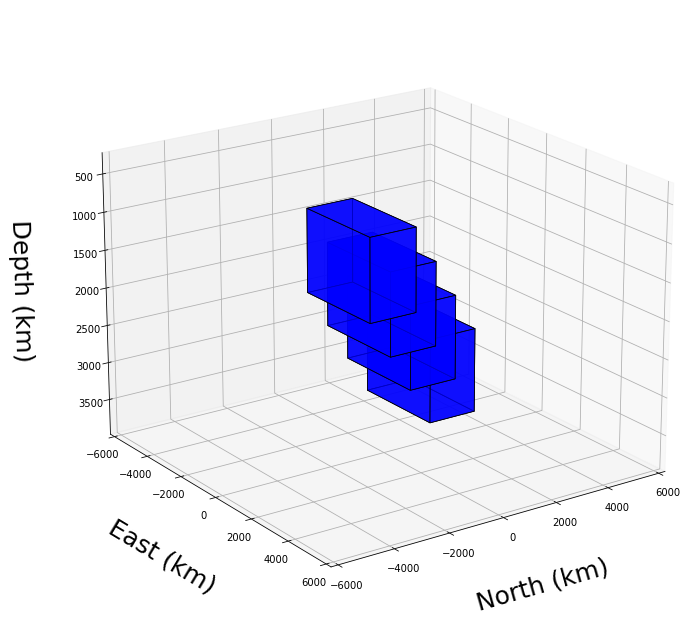

In [10]:
x = ga.x
y = ga.y
#z = top.z

# coordenadas dos vertices (corners) do prisma, em metros:
y1,y2  = (-1700.0, 1700.0)
x1,x2 = (-1700.0, 0.0)
z1,z2  = (800.0, 1900.0)   # z eh positivo para baixo!
deltaz = 1000.0
deltay = 1500.0
deltax = 1500.0
incl = 'positivo'

dic = {'n': 4,
       'x': [x1, x2],
       'y': [y1, y2],
       'z': [z1, z2],
       'deltay': deltay,
       'deltaz': deltaz,
       'deltax': deltax,
       'incl': incl,
       'merg': 'x'}

pointx, pointy, pointz = plot_3D.creat_point(**dic)


dic1 = {'x': [pointx[0], pointx[1]],
        'y': [pointy[0], pointy[1]],
        'z': [pointz[0], pointz[1]]}

dic2 = {'x': [pointx[2], pointx[3]],
        'y': [pointy[2], pointy[3]],
        'z': [pointz[2], pointz[3]]}

dic3 = {'x': [pointx[4], pointx[5]],
        'y': [pointy[4], pointy[5]],
        'z': [pointz[4], pointz[5]]}

dic4 = {'x': [pointx[6], pointx[7]],
        'y': [pointy[6], pointy[7]],
        'z': [pointz[6], pointz[7]]}

'''dic5 = {'x': [pointx[8], pointx[9]],
        'y': [pointy[8], pointy[9]],
        'z': [pointz[8], pointz[9]]}'''
#----------------------------------------------------------------------------------------------------#
vert1 =  plot_3D.vert_point(dic1)
vert2 =  plot_3D.vert_point(dic2)
vert3 =  plot_3D.vert_point(dic3)
vert4 =  plot_3D.vert_point(dic4)
#vert5 =  plot_3D.vert_point(dic5)'''
#----------------------------------------------------------------------------------------------------#
color = 'b'
size = [9, 10]
view = [200,305]
#----------------------------------------------------------------------------------------------------#
prism_1 = plot_3D.plot_prism(vert1, color)
prism_2 = plot_3D.plot_prism(vert2, color)
prism_3 = plot_3D.plot_prism(vert3, color)
prism_4 = plot_3D.plot_prism(vert4, color)
#prism_5 = plot_3D.plot_prism(vert5, color)'''
#----------------------------------------------------------------------------------------------------#
prisma1 = {'n': 4,
         'prisma': [prism_1, prism_2,prism_3, prism_4]} #prism_5]}#, prism_2,prism_3]}

plot_3D.plot_obs_3d(prisma1, size, view, x, y, pointz)

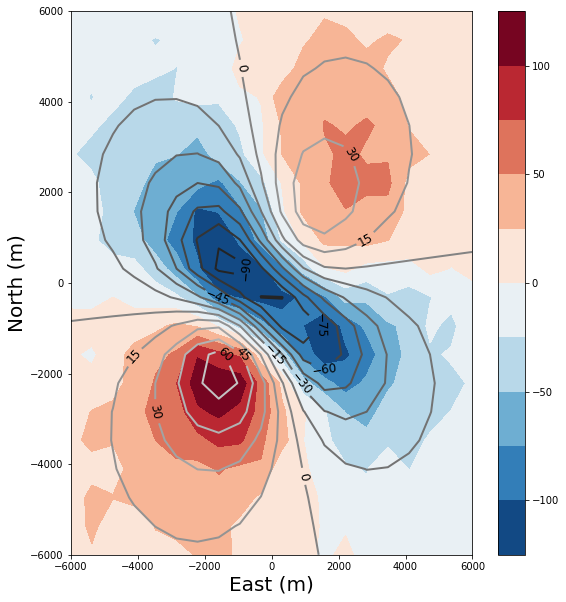

In [11]:
plt.figure(figsize=(9,10))
bolas = plt.contour(Y, X, final_anomaly, levels = 10, cmap = 'gray', linewidths = 2, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
plt.clabel(bolas , inline=2, fontsize=12, colors = 'k')
cubo = plt.contourf(Y, X, anomaly_cubo, 10, cmap = plt.cm.RdBu_r, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#arrow = plt.arrow(0.0, 0.0, 1000.0*ptx, 1000.0*pty, width=50.0,head_width=250.0, length_includes_head = False, color = 'k')
#arrow1 = plt.arrow(0.0, 0.0, 1000.0*rptx, 1000.0*rpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'g')
#arrow2 = plt.arrow(0.0, 0.0, 1000.0*bptx, 1000.0*bpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'y')
#first_legend = plt.legend(handles=[cubo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, arrow1, arrow2], ['Vetor magnetização da fonte', 'Vetor magnetização do campo Regional', 'Vetor de magnetização do Campo estimado'], bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.title('Total Field Anomaly of the final subject(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
plt.colorbar()
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()

In [12]:
residuo_anomaly = anomaly_cubo - final_anomaly
res = np.reshape(residuo_anomaly, (400))
#print(res)

res_mu = np.mean(res)
res_sigma = np.std(res)

from scipy.stats import norm

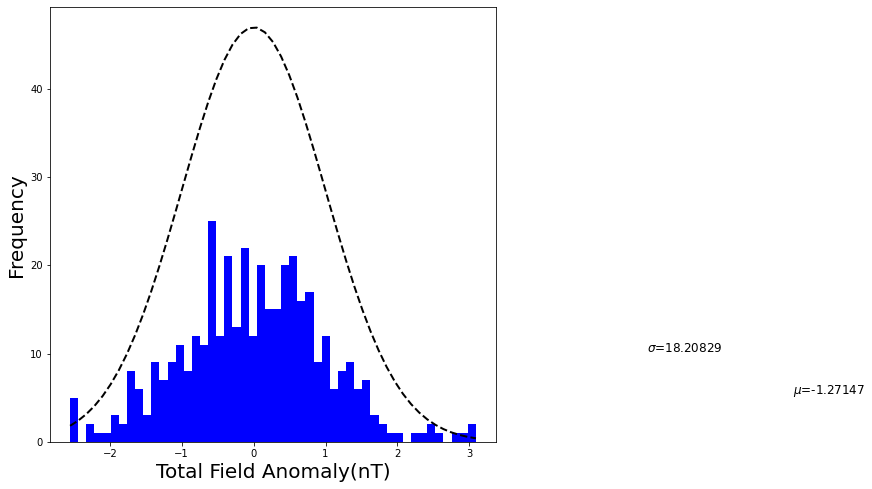

In [13]:
plt.figure(figsize=(8,8))
s = (res - res_mu) / res_sigma
s = np.ravel(s)
nbins = int(np.max(s) - np.min(s))
n, bins, patches = plt.hist(s, 50, facecolor = 'blue', alpha = 1.)
y_hist = norm.pdf(bins, np.mean(s), np.std(s))
plt.plot(bins, np.max(anomaly_cubo)*y_hist, 'k--', linewidth = 2)
plt.xlabel('Total Field Anomaly(nT)', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.text(8,5.5, '$\mu$=%0.5f' % (res_mu), horizontalalignment = 'center', fontsize = 12)
plt.text(6,10.2, '$\sigma$=%0.5f' % (res_sigma), horizontalalignment = 'center', fontsize = 12)
plt.show()

In [14]:
print(np.mean(s), np.std(s))
print(np.max(res))

-8.326672684688674e-18 0.9999999999999999
55.02803365973941


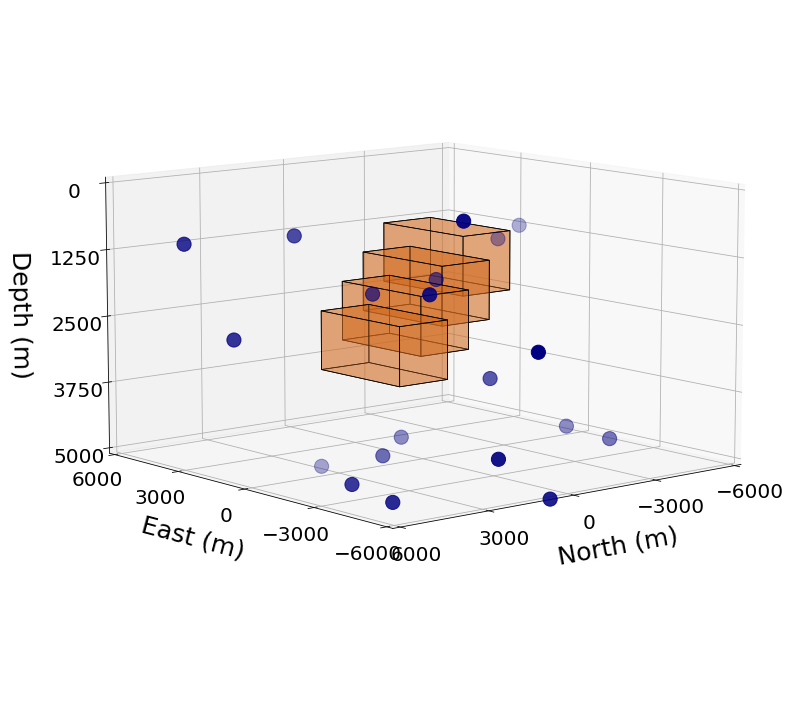

In [15]:
# Plot the main 3D source
figure = plt.figure(figsize=(10,10))

ax = figure.gca(projection = '3d')

fig01 = Poly3DCollection(vert1, alpha = 0.35, linewidths = 0.75, edgecolors = 'k')
fig01.set_facecolor('chocolate')
ax.add_collection3d(fig01)

fig02 = Poly3DCollection(vert2, alpha = 0.35, linewidths = 0.75, edgecolors = 'k')
fig02.set_facecolor('chocolate')
ax.add_collection3d(fig02)

fig03 = Poly3DCollection(vert3, alpha = 0.35, linewidths = 0.75, edgecolors = 'k')
fig03.set_facecolor('chocolate')
ax.add_collection3d(fig03)

fig04 = Poly3DCollection(vert4, alpha = 0.35, linewidths = 0.75, edgecolors = 'k')
fig04.set_facecolor('chocolate')
ax.add_collection3d(fig04)

'''fig05 = Poly3DCollection(vert5, alpha = 0.35, linewidths = 0.75, edgecolors = 'k')
fig05.set_facecolor('chocolate')
ax.add_collection3d(fig05)'''

individuo0 = ax.scatter(coodX1, coodY1, coodZ1, c=incl1, depthshade=True, cmap='jet', s = 200.0)

# Define the scale of the projection
x_scale = 1.2
y_scale = 1.2
z_scale = 1.
scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)
ax.get_proj = short_proj

# Labels
ax.set_xlabel('North (m)', size = 25, labelpad = 30)
ax.set_ylabel('East (m)', size = 25, labelpad = 30)
ax.set_zlabel('Depth (m)', size = 25, labelpad = 30)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_zlim(0., 5000)
ax.set_xticks(np.linspace(x.min(), x.max(), 5))
ax.set_yticks(np.linspace(y.min(), y.max(), 5))
ax.set_zticks(np.linspace(0, 5000, 5))
ax.tick_params(labelsize = 20, pad = 10)
#plt.title('Total Field Anomaly of the final subject(nT)', fontsize = 20)

# Visualization angle
ax.view_init(190, 130)#335,245

plt.tight_layout(True)
#plt.savefig('figs/dikemodel-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
#plt.savefig('figs/dikemodel-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
plt.show()

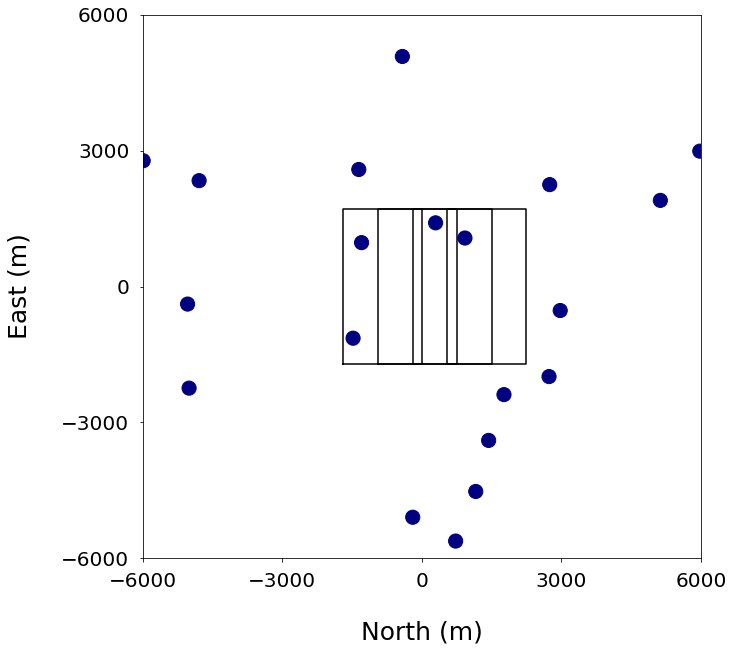

In [16]:
figure = plt.figure(figsize=(10,10))
ax = figure.gca()

individuo_0 = ax.scatter(coodX1, coodY1, c=incl1, cmap='jet', s = 200.0)

xs1 = [pointx[0], pointx[0], pointx[1], pointx[1], pointx[0]]
ys1 = [pointy[0], pointy[1], pointy[1], pointy[0], pointy[0]]
corpo = plt.plot(xs1,ys1,'k-')

xs2 = [pointx[2], pointx[2], pointx[3], pointx[3], pointx[2]]
ys2 = [pointy[2], pointy[3], pointy[3], pointy[2], pointy[2]]
corpo2 = plt.plot(xs2,ys2,'k-')

xs3 = [pointx[4], pointx[4], pointx[5], pointx[5], pointx[4]]
ys3 = [pointy[4], pointy[5], pointy[5], pointy[4], pointy[4]]
corpo3 = plt.plot(xs3,ys3,'k-')

xs4 = [pointx[6], pointx[6], pointx[7], pointx[7], pointx[6]]
ys4 = [pointy[6], pointy[7], pointy[7], pointy[6], pointy[6]]
corpo4 = plt.plot(xs4,ys4,'k-')

'''xs5 = [pointx[8], pointx[8], pointx[9], pointx[9], pointx[8]]
ys5 = [pointy[8], pointy[9], pointy[9], pointy[8], pointy[8]]
corpo5 = plt.plot(xs5,ys5,'k-')'''

# Labels
ax.set_xlabel('North (m)', size = 25, labelpad = 30)
ax.set_ylabel('East (m)', size = 25, labelpad = 30)
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_xticks(np.linspace(X.min(), X.max(), 5))
ax.set_yticks(np.linspace(Y.min(), Y.max(), 5))
ax.tick_params(labelsize = 20, pad = 10)

plt.show()

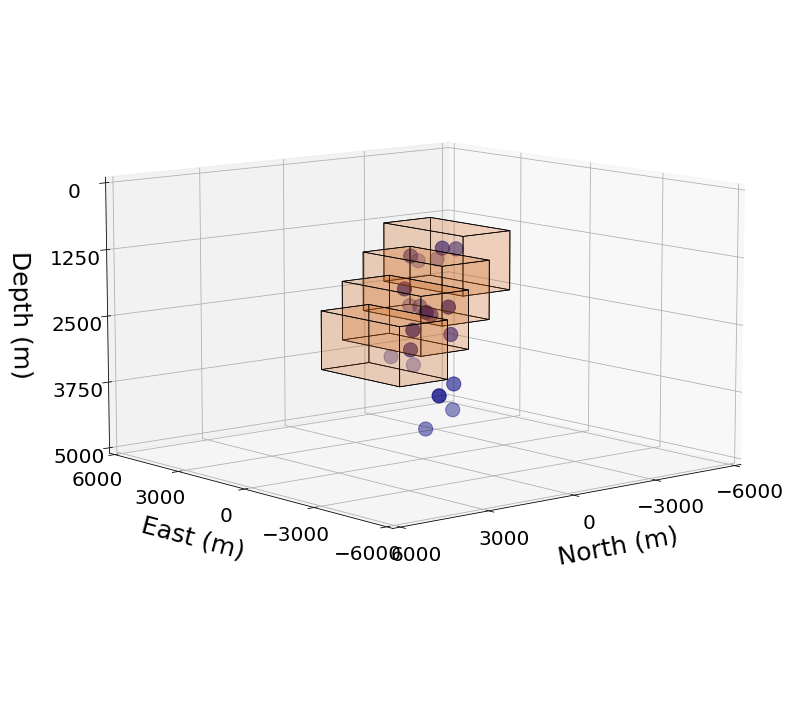

In [17]:
# Plot the main 3D source
figure = plt.figure(figsize=(10,10))

ax = figure.gca(projection = '3d')
#ax.set_title('Vertical dike model', size = 18)

#x1, x2, y1, y2, z1, z2 = fonte_crustal_mag[:6]
'''v = np.array([[x1, y1, z2], [x1, y2, z2], [x2, y2, z2], [x2, y1, z2], 
                 [x1, y1, z1], [x1, y2, z1], [x2, y2, z1], [x2, y1, z1]])
vert =  [[v[0],v[1],v[2],v[3]], 
         [v[0],v[1],v[5],v[4]], 
         [v[1],v[2],v[6],v[5]],
         [v[2],v[3],v[7],v[6]], 
         [v[3],v[0],v[4],v[7]], 
         [v[4],v[5],v[6],v[7]]]'''

fig01 = Poly3DCollection(vert1, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig01.set_facecolor('chocolate')
ax.add_collection3d(fig01)

fig02 = Poly3DCollection(vert2, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig02.set_facecolor('chocolate')
ax.add_collection3d(fig02)

fig03 = Poly3DCollection(vert3, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig03.set_facecolor('chocolate')
ax.add_collection3d(fig03)

fig04 = Poly3DCollection(vert4, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig04.set_facecolor('chocolate')
ax.add_collection3d(fig04)

'''fig05 = Poly3DCollection(vert5, alpha = 0.35, linewidths = 0.75, edgecolors = 'k')
fig05.set_facecolor('chocolate')
ax.add_collection3d(fig05)'''

individuo0 = ax.scatter(coodX2, coodY2, coodZ2, c=incl2, depthshade=True, cmap='jet', s = 200.0)

# Define the scale of the projection
x_scale = 1.2
y_scale = 1.2
z_scale = 1.
scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)
ax.get_proj = short_proj

# Labels
ax.set_xlabel('North (m)', size = 25, labelpad = 30)
ax.set_ylabel('East (m)', size = 25, labelpad = 30)
ax.set_zlabel('Depth (m)', size = 25, labelpad = 30)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_zlim(0., 5000)
ax.set_xticks(np.linspace(x.min(), x.max(), 5))
ax.set_yticks(np.linspace(y.min(), y.max(), 5))
ax.set_zticks(np.linspace(0, 5000, 5))
ax.tick_params(labelsize = 20, pad = 10)
#plt.title('Total Field Anomaly of the final subject(nT)', fontsize = 20)

# Visualization angle
ax.view_init(190, 130)

plt.tight_layout(True)
#plt.savefig('figs/dikemodel-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
#plt.savefig('figs/dikemodel-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
plt.show()

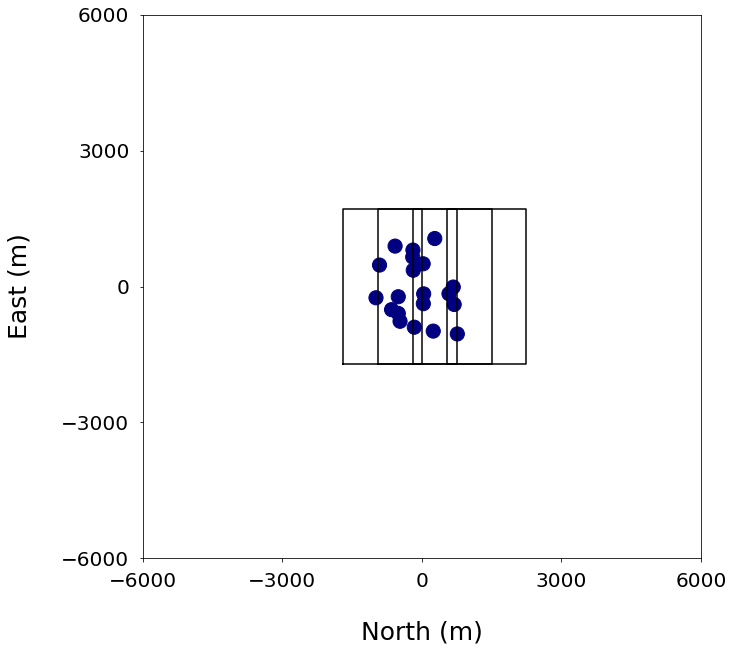

In [18]:
figure = plt.figure(figsize=(10,10))
ax = figure.gca()

individuo_0 = ax.scatter(coodX2, coodY2, c=incl2, cmap='jet', s = 200.0)

xs1 = [pointx[0], pointx[0], pointx[1], pointx[1], pointx[0]]
ys1 = [pointy[0], pointy[1], pointy[1], pointy[0], pointy[0]]
corpo = plt.plot(xs1,ys1,'k-')

xs2 = [pointx[2], pointx[2], pointx[3], pointx[3], pointx[2]]
ys2 = [pointy[2], pointy[3], pointy[3], pointy[2], pointy[2]]
corpo2 = plt.plot(xs2,ys2,'k-')

xs3 = [pointx[4], pointx[4], pointx[5], pointx[5], pointx[4]]
ys3 = [pointy[4], pointy[5], pointy[5], pointy[4], pointy[4]]
corpo3 = plt.plot(xs3,ys3,'k-')

xs4 = [pointx[6], pointx[6], pointx[7], pointx[7], pointx[6]]
ys4 = [pointy[6], pointy[7], pointy[7], pointy[6], pointy[6]]
corpo4 = plt.plot(xs4,ys4,'k-')

'''xs5 = [pointx[8], pointx[8], pointx[9], pointx[9], pointx[8]]
ys5 = [pointy[8], pointy[9], pointy[9], pointy[8], pointy[8]]
corpo5 = plt.plot(xs5,ys5,'k-')'''

# Labels
ax.set_xlabel('North (m)', size = 25, labelpad = 30)
ax.set_ylabel('East (m)', size = 25, labelpad = 30)
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_xticks(np.linspace(X.min(), X.max(), 5))
ax.set_yticks(np.linspace(Y.min(), Y.max(), 5))
ax.tick_params(labelsize = 20, pad = 10)

plt.show()

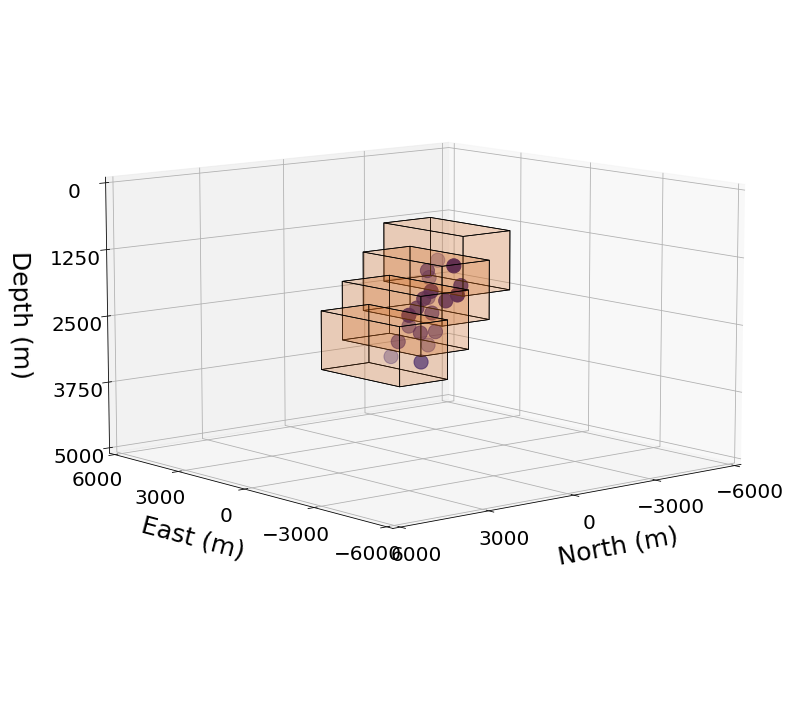

In [19]:
# Plot the main 3D source
figure = plt.figure(figsize=(10,10))

ax = figure.gca(projection = '3d')

fig01 = Poly3DCollection(vert1, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig01.set_facecolor('chocolate')
ax.add_collection3d(fig01)

fig02 = Poly3DCollection(vert2, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig02.set_facecolor('chocolate')
ax.add_collection3d(fig02)

fig03 = Poly3DCollection(vert3, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig03.set_facecolor('chocolate')
ax.add_collection3d(fig03)

fig04 = Poly3DCollection(vert4, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig04.set_facecolor('chocolate')
ax.add_collection3d(fig04)

'''fig05 = Poly3DCollection(vert5, alpha = 0.35, linewidths = 0.75, edgecolors = 'k')
fig05.set_facecolor('chocolate')
ax.add_collection3d(fig05)'''

individuo0 = ax.scatter(coodX3, coodY3, coodZ3, c=incl3, depthshade=True, cmap='jet', s = 200.0)

# Define the scale of the projection
x_scale = 1.2
y_scale = 1.2
z_scale = 1.
scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)
ax.get_proj = short_proj

# Labels
ax.set_xlabel('North (m)', size = 25, labelpad = 30)
ax.set_ylabel('East (m)', size = 25, labelpad = 30)
ax.set_zlabel('Depth (m)', size = 25, labelpad = 30)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_zlim(0., 5000)
ax.set_xticks(np.linspace(x.min(), x.max(), 5))
ax.set_yticks(np.linspace(y.min(), y.max(), 5))
ax.set_zticks(np.linspace(0, 5000, 5))
ax.tick_params(labelsize = 20, pad = 10)
#plt.title('Total Field Anomaly of the final subject(nT)', fontsize = 20)

# Visualization angle
ax.view_init(190, 130)

plt.tight_layout(True)
#plt.savefig('figs/dikemodel-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
#plt.savefig('figs/dikemodel-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
plt.show()

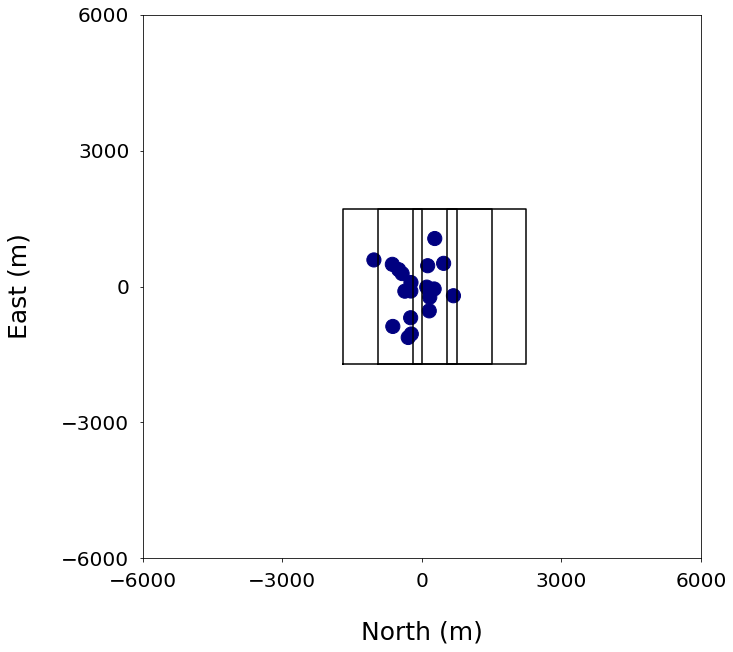

In [20]:
figure = plt.figure(figsize=(10,10))
ax = figure.gca()

individuo_0 = ax.scatter(coodX3, coodY3, c=incl3, cmap='jet', s = 200.0)

xs1 = [pointx[0], pointx[0], pointx[1], pointx[1], pointx[0]]
ys1 = [pointy[0], pointy[1], pointy[1], pointy[0], pointy[0]]
corpo = plt.plot(xs1,ys1,'k-')

xs2 = [pointx[2], pointx[2], pointx[3], pointx[3], pointx[2]]
ys2 = [pointy[2], pointy[3], pointy[3], pointy[2], pointy[2]]
corpo2 = plt.plot(xs2,ys2,'k-')

xs3 = [pointx[4], pointx[4], pointx[5], pointx[5], pointx[4]]
ys3 = [pointy[4], pointy[5], pointy[5], pointy[4], pointy[4]]
corpo3 = plt.plot(xs3,ys3,'k-')

xs4 = [pointx[6], pointx[6], pointx[7], pointx[7], pointx[6]]
ys4 = [pointy[6], pointy[7], pointy[7], pointy[6], pointy[6]]
corpo4 = plt.plot(xs4,ys4,'k-')

'''xs5 = [pointx[8], pointx[8], pointx[9], pointx[9], pointx[8]]
ys5 = [pointy[8], pointy[9], pointy[9], pointy[8], pointy[8]]
corpo5 = plt.plot(xs5,ys5,'k-')'''

# Labels
ax.set_xlabel('North (m)', size = 25, labelpad = 30)
ax.set_ylabel('East (m)', size = 25, labelpad = 30)
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_xticks(np.linspace(X.min(), X.max(), 5))
ax.set_yticks(np.linspace(Y.min(), Y.max(), 5))
ax.tick_params(labelsize = 20, pad = 10)

plt.show()

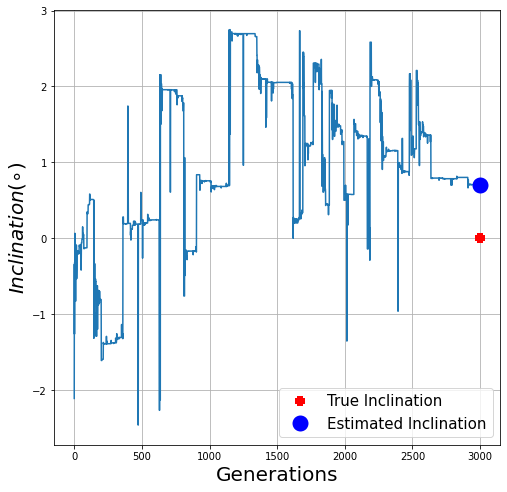

In [21]:
x = np.linspace(0, n_fit, n_fit)
fig = plt.figure(figsize=(8, 8))
plt.plot(x, incl_rodada)
incl_v = plt.plot(3000,0,'r+', mew = 10.0, label = 'True Inclination')
incl_c = plt.plot(3000,incl_rodada[2999],'bo', mew = 10.0, label = 'Estimated Inclination')
#plt.ylim(0, max(fit_rodada))
#plt.title('Com o Lamb = 0.005', fontsize=20)
#plt.legend([incl_v, incl_c], ['Inclinação magnética da fonte', 'Inclinação magnética calculada'], bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
plt.legend(fontsize=15)
plt.xlabel('Generations', fontsize=20)
plt.ylabel('$Inclination(\circ)$', fontsize=20)
plt.grid()
plt.show()

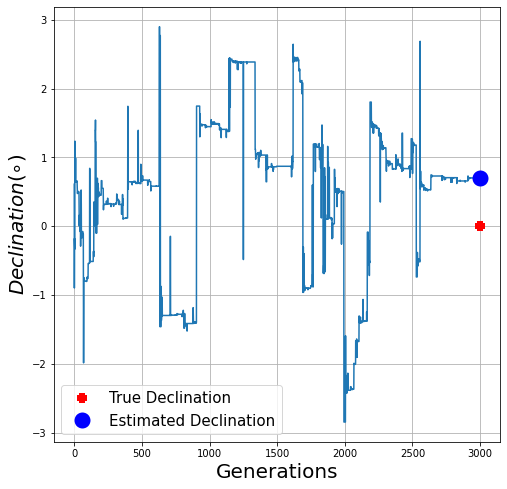

In [22]:
x = np.linspace(0, n_fit, n_fit)
fig = plt.figure(figsize=(8, 8))
plt.plot(x, decl_rodada)
decl_v = plt.plot(3000,0,'r+', mew = 10.0, label = 'True Declination')
decl_c = plt.plot(3000,decl_rodada[2999],'bo', mew = 10.0, label = 'Estimated Declination')
#plt.ylim(0, max(fit_rodada))
#plt.title('Com o Lamb = 0.005', fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('Generations', fontsize=20)
plt.ylabel('$Declination(\circ)$', fontsize=20)
plt.grid()
plt.show()

In [24]:
pop = ga.population
data_e_hora_atuais = datetime.now()
data_e_hora = data_e_hora_atuais.strftime('%d_%m_%Y_%H_%M')

dicionario = {'Data da Modelagem': data_e_hora,
              'Tipo de Teste': 'Algoritmo genético com o método alternativo 5X1',
              'números de corpos': 1,
              'Coordenadas do prisma 1 (x1, x2, y1, y2, z1, z2)': [pointx[0], pointx[1], pointy[0], pointy[1], pointz[0], pointz[1]],
              'Informação magnética da fonte (Incl, Decl, Momento)': [I, D, momento],
              'Parâmetros da população inicial': pop
              }

print(dicionario)

incl_rodada = np.array(incl_rodada)
decl_rodada = np.array(decl_rodada)
fit_rodada = np.array(fit_rodada)
phi_rodada = np.array(phi_rodada)#np.zeros((5,5))#np.array(phi_rodada)#np.array(phi_rodada)
theta_rodada = np.array(theta_rodada)#np.zeros((5,5))#np.array(theta_rodada)#np.array(theta_rodada)

#salve_doc.create_diretorio_dipolos(dicionario, frist_ind, mid_ind, last_ind, incl_rodada, decl_rodada, fit_rodada, phi_rodada, theta_rodada)

{'Data da Modelagem': '05_10_2021_20_36', 'Tipo de Teste': 'Algoritmo genético com o método alternativo 5X1', 'números de corpos': 1, 'Coordenadas do prisma 1 (x1, x2, y1, y2, z1, z2)': [-1700.0, 0.0, -1700.0, 1700.0, 800.0, 1900.0], 'Informação magnética da fonte (Incl, Decl, Momento)': [5.0, 70.0, 1270000000.0], 'Parâmetros da população inicial': {'xmax': 6000.0, 'xmin': -6000.0, 'ymax': 6000.0, 'ymin': -6000.0, 'zlim': 6000.0, 'z_min': 0.0, 'n_dip': 20, 'n_pop': 50, 'inclmax': 3.0, 'inclmin': -3.0, 'declmax': 3.0, 'declmin': -3.0, 'mmax': 1270000000.0, 'mmin': 1270000000.0, 'homogeneo': True}}
